# <font color=2b7cb6> **Data Mining II - Budgeting For The Future** </font>
## <font color=4f9dd6> **Notebook 2: Feature Selection and Modeling** </font>

<u>**Group 06:**</u>
- Eduardo Amaral, 20230355
- Joana Oliveira, 20230384
- João Freitas, 20231472
- Rúben Machado, 20230367
- Teresa Santos, 20230380

## <font color=72beea> **Imports** </font>


In [ ]:
# To show all ouput that are in the same input cell (allow to run more than one function/method in the same cell)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import math
import time
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, date
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression, RidgeClassifier
from sklearn.feature_selection import RFE, f_classif, SelectKBest
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report, roc_curve, auc, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.stats import uniform, randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Homework_Group06/'

Mounted at /content/drive


In [ ]:
# Import clean_train dataset
train_clean = pd.read_csv(path + 'DM2_Project Datasets/clean_train.csv', index_col='citizen_id')
train_clean

,last_year_avg_monthly_charity_donations,environmental_awareness_rating,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,...,log_avg_weekly_exercise_hours,log_health_consciousness_rating,lifestyle_encoded,health_index,age_bins_encoded,investment_profile,investment_pca,tech_pca,health_pca,entertainment_pca
citizen_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.93520,4.6110,3.5313,6.06605,11.9772,9.9506,1.757500,23.0605,0.177600,...,0.163478,0.501018,4,2,2,7,0.318707,0.037378,-0.088345,-0.008915
2,0.0,0.56720,5.4308,6.6175,13.64450,11.8776,5.1521,1.967700,18.1098,1.278200,...,0.823386,0.702602,1,5,1,11,-1.706912,-0.941306,-0.163217,-0.244014
3,1.0,0.56130,4.6110,6.9319,5.88670,14.4247,3.6737,1.869300,37.5970,0.035400,...,0.034788,1.407420,2,6,1,8,-0.541245,0.023632,2.535693,-0.685024
4,0.0,0.35430,4.6110,7.0968,9.10740,12.3668,5.5798,1.576900,8.2142,1.776300,...,1.021119,0.313130,1,3,3,9,-1.227570,-0.618092,-1.144983,1.265110
5,0.0,0.59430,4.6110,5.8014,4.08920,15.8389,3.7712,1.955800,14.3443,0.000000,...,0.000000,0.513901,0,2,3,8,0.265498,0.737321,-0.001830,-0.015420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90161,0.0,0.81880,0.5000,7.1792,9.54410,12.9497,5.0265,2.163900,44.7958,0.857248,...,0.619096,0.995176,3,4,2,7,-1.515151,-0.438919,0.082815,-1.471838
90162,0.0,0.60330,4.6110,5.0231,8.98110,12.5240,5.0200,2.316500,95.1422,0.199700,...,0.182072,0.554058,3,4,3,8,-0.655854,-0.649325,1.325854,-2.484097
90163,0.0,0.67100,4.6110,6.3267,5.17330,13.4334,12.9103,2.420900,48.7617,2.226500,...,1.171398,1.225304,1,6,3,8,-0.197396,1.326276,-0.323079,-2.096990


In [ ]:
# Import clean_test dataset
test_clean = pd.read_csv(path + 'DM2_Project Datasets/clean_test.csv', index_col='citizen_id')
test_clean

,last_year_avg_monthly_charity_donations,environmental_awareness_rating,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,...,log_avg_monthly_entertainment_expenses,log_avg_weekly_exercise_hours,log_health_consciousness_rating,health_index,age_bins_encoded,investment_profile,investment_pca,tech_pca,health_pca,entertainment_pca
citizen_id,,,,,,,,,,,,,,,,,,,,,
90166,0.0,0.6724,4.6110,1.7516,8.4129,15.1645,9.392500,2.2621,64.2378,0.0626,...,4.178039,0.060719,0.569396,4,3,6,0.311029,1.495163,1.401921,-2.008971
90167,0.0,0.5993,7.1811,0.0034,6.6384,15.3898,6.610100,1.8308,18.7592,0.5960,...,2.983619,0.467500,0.878007,4,4,7,1.163941,1.066739,-0.215980,0.017087
90168,0.0,0.6675,4.6110,2.3346,4.2747,12.7121,11.924800,1.7735,11.2036,1.3633,...,2.501731,0.860059,1.268917,6,3,6,1.126129,0.780952,-0.155549,0.585530
90169,0.0,2.3741,4.6110,7.2085,14.3043,11.5065,3.642200,2.1187,48.5756,2.6768,...,3.903499,1.302043,0.592166,6,4,11,-1.952003,-1.416184,-1.006558,-1.448849
90170,0.0,0.6015,4.8217,4.2585,6.3106,15.8794,7.856100,1.4942,31.5998,0.0000,...,3.484306,0.000000,0.710938,2,2,8,0.072544,1.548703,-0.122612,0.271528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128804,0.0,3.5502,4.6110,7.9508,12.1804,14.2306,0.348800,0.9117,6.0649,0.7736,...,1.955139,0.573011,0.525557,2,3,10,-1.898913,-0.715957,-1.958195,2.930097
128805,0.0,0.4119,8.1052,0.5497,3.4697,13.0287,13.004700,2.5738,47.5229,0.0916,...,3.882036,0.087645,0.443467,2,3,6,1.926903,1.145738,0.049360,-2.399823
128806,0.0,1.1734,4.6110,6.7662,10.8467,10.8360,1.705300,1.6949,15.0828,1.3528,...,2.777750,0.855606,0.674321,4,2,9,-1.405691,-2.120892,-1.191354,0.497623


In [ ]:
X = train_clean.drop(['lifestyle_encoded'], axis = 1)
Y = train_clean['lifestyle_encoded']

In [ ]:
X_original = X[['last_year_avg_monthly_charity_donations',
               'environmental_awareness_rating', 'investment_portfolio_value',
               'investments_risk_appetite', 'investments_risk_tolerance',
               'tech_savviness_score', 'social_media_influence_score',
               'entertainment_engagement_factor', 'avg_monthly_entertainment_expenses',
               'avg_weekly_exercise_hours', 'health_consciousness_rating',
               'stress_management_score', 'overall_well_being']]

X_feature_engineering = X[['log_environmental_awareness_rating',
                        'log_investment_portfolio_value', 'log_investments_risk_tolerance',
                        'log_avg_monthly_entertainment_expenses',
                        'log_avg_weekly_exercise_hours', 'log_health_consciousness_rating',
                        'last_year_avg_monthly_charity_donations', 'investments_risk_appetite',
                        'tech_savviness_score', 'social_media_influence_score',
                        'entertainment_engagement_factor', 'stress_management_score',
                        'overall_well_being', 'gender_encoded', 'age_bins_encoded']]

X_PCA = X[['investment_pca', 'tech_pca', 'health_pca', 'entertainment_pca',
          'age_bins_encoded', 'log_environmental_awareness_rating',
          'last_year_avg_monthly_charity_donations',
          'overall_well_being', 'gender_encoded']]

## <font color=72beea> **3. Feature Selection** </font>

### <font color=72beea> **3.1. RFE** </font>

In [ ]:
# Create model and RFE Instance
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 8)
X_rfe = rfe.fit_transform(X = X_feature_engineering, y = Y)
X_rfe

array([[  1.07677559,   1.95530163,   3.18057149, ...,   9.9506    ,
          2.885     , 106.282     ],
       [  0.44929059,   2.68406484,   2.95020129, ...,   5.1521    ,
          3.5777    , 132.121     ],
       [  0.44551881,   1.92959202,   3.65317455, ...,   3.6737    ,
          5.1906    , 115.547     ],
       ...,
       [  0.51342225,   1.82023354,   3.90724561, ...,  12.9103    ,
          2.9948    , 105.443     ],
       [  0.45330244,   1.72337356,   2.52037031, ...,  12.1893    ,
          2.1157    , 105.876     ],
       [  0.6966209 ,   1.88778152,   1.96013704, ...,   3.0482    ,
          1.9988    , 104.298     ]])

In [ ]:
# Check the variables selected by RFE as the most "important" ones
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True, False, False])

In [ ]:
# Check the ranking of the variables defined by RFE
rfe.ranking_

array([1, 5, 1, 1, 1, 1, 7, 3, 4, 1, 2, 1, 1, 8, 6])

In [ ]:
# Object with the data columns names and the support_ attribute
selected_features = pd.Series(rfe.support_, index=X_feature_engineering.columns)
selected_features

log_environmental_awareness_rating          True
log_investment_portfolio_value             False
log_investments_risk_tolerance              True
log_avg_monthly_entertainment_expenses      True
log_avg_weekly_exercise_hours               True
log_health_consciousness_rating             True
last_year_avg_monthly_charity_donations    False
investments_risk_appetite                  False
tech_savviness_score                       False
social_media_influence_score                True
entertainment_engagement_factor            False
stress_management_score                     True
overall_well_being                          True
gender_encoded                             False
age_bins_encoded                           False
dtype: bool

### <font color=72beea> **3.2. Lasso Regression** </font>

In [ ]:
scaler = StandardScaler().fit(X_feature_engineering)
X_scaled = pd.DataFrame(scaler.transform(X_feature_engineering), columns=X_feature_engineering.columns, index=X_feature_engineering.index)

In [ ]:
reg = LassoCV(cv=5, random_state=15)
reg.fit(X_scaled, Y)

LassoCV(cv=5, random_state=15)

In [ ]:
coef = pd.Series(reg.coef_, index = X_scaled.columns)
coef.sort_values()

log_avg_weekly_exercise_hours             -0.846501
entertainment_engagement_factor           -0.336849
stress_management_score                   -0.095986
overall_well_being                        -0.077063
log_investment_portfolio_value            -0.058795
investments_risk_appetite                 -0.049901
log_environmental_awareness_rating        -0.039135
log_health_consciousness_rating           -0.037896
age_bins_encoded                          -0.003191
gender_encoded                             0.001809
last_year_avg_monthly_charity_donations    0.025606
log_investments_risk_tolerance             0.030778
tech_savviness_score                       0.169592
social_media_influence_score               0.170971
log_avg_monthly_entertainment_expenses     0.456746
dtype: float64

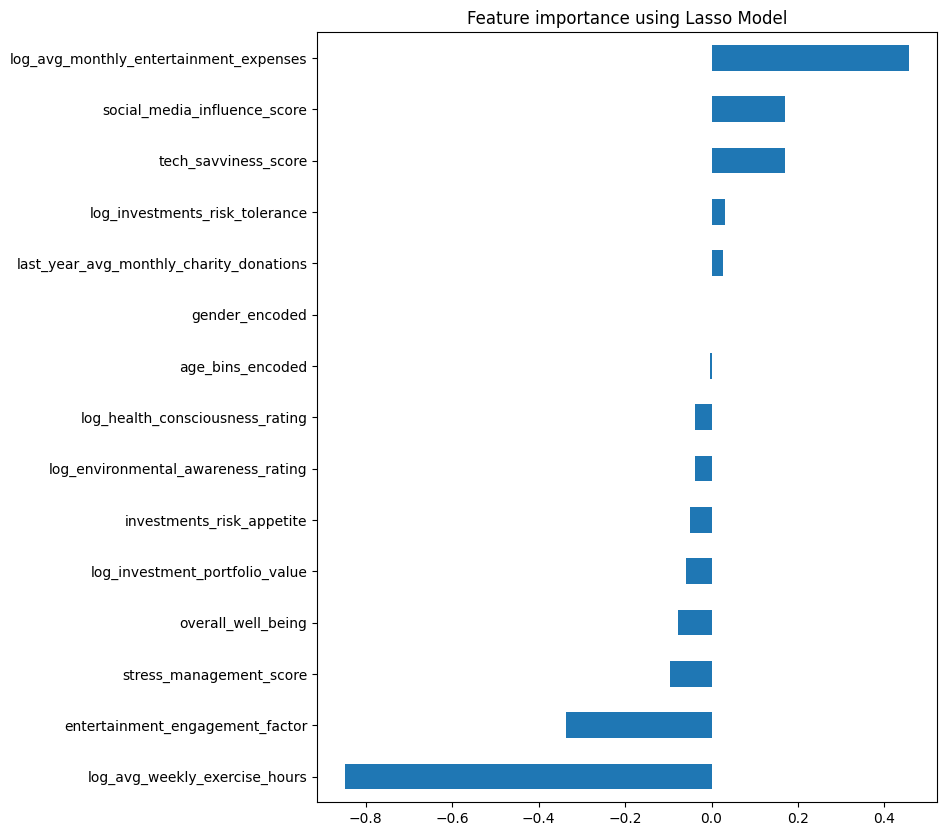

In [ ]:
def plot_importance(coef,name):
  imp_coef = coef.sort_values()
  plt.figure(figsize=(8,10))
  imp_coef.plot(kind = "barh")
  plt.title("Feature importance using " + name + " Model")
  plt.show()

plot_importance(coef,'Lasso')

In [ ]:
coef = pd.Series(reg.coef_, index=X_scaled.columns)

selected_columns = coef[coef != 0].index.tolist()
selected_columns

['log_environmental_awareness_rating',
 'log_investment_portfolio_value',
 'log_investments_risk_tolerance',
 'log_avg_monthly_entertainment_expenses',
 'log_avg_weekly_exercise_hours',
 'log_health_consciousness_rating',
 'last_year_avg_monthly_charity_donations',
 'investments_risk_appetite',
 'tech_savviness_score',
 'social_media_influence_score',
 'entertainment_engagement_factor',
 'stress_management_score',
 'overall_well_being',
 'gender_encoded',
 'age_bins_encoded']

### <font color=72beea> **3.3. ANOVA** </font>

In [ ]:
anova = SelectKBest(f_classif, k=8)

In [ ]:
X_anova = anova.fit_transform(X_feature_engineering, Y)

In [ ]:
selected_features = pd.Series(anova.get_support(), index = X_feature_engineering.columns)
selected_features

log_environmental_awareness_rating          True
log_investment_portfolio_value              True
log_investments_risk_tolerance             False
log_avg_monthly_entertainment_expenses      True
log_avg_weekly_exercise_hours               True
log_health_consciousness_rating             True
last_year_avg_monthly_charity_donations     True
investments_risk_appetite                  False
tech_savviness_score                       False
social_media_influence_score                True
entertainment_engagement_factor            False
stress_management_score                     True
overall_well_being                         False
gender_encoded                             False
age_bins_encoded                           False
dtype: bool

### <font color=72beea> **3.4. Using Random Forest** </font>

RandomForestClassifier(n_estimators=200, random_state=42)

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances - Random Forest')

<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x7c813a7ca5f0>,
 [Text(0, 0, 'avg_weekly_exercise_hours'),
  Text(1, 0, 'overall_well_being'),
  Text(2, 0, 'social_media_influence_score'),
  Text(3, 0, 'avg_monthly_entertainment_expenses'),
  Text(4, 0, 'health_consciousness_rating'),
  Text(5, 0, 'investments_risk_tolerance'),
  Text(6, 0, 'environmental_awareness_rating'),
  Text(7, 0, 'stress_management_score'),
  Text(8, 0, 'entertainment_engagement_factor'),
  Text(9, 0, 'tech_savviness_score'),
  Text(10, 0, 'investments_risk_appetite'),
  Text(11, 0, 'investment_portfolio_value'),
  Text(12, 0, 'last_year_avg_monthly_charity_donations')])

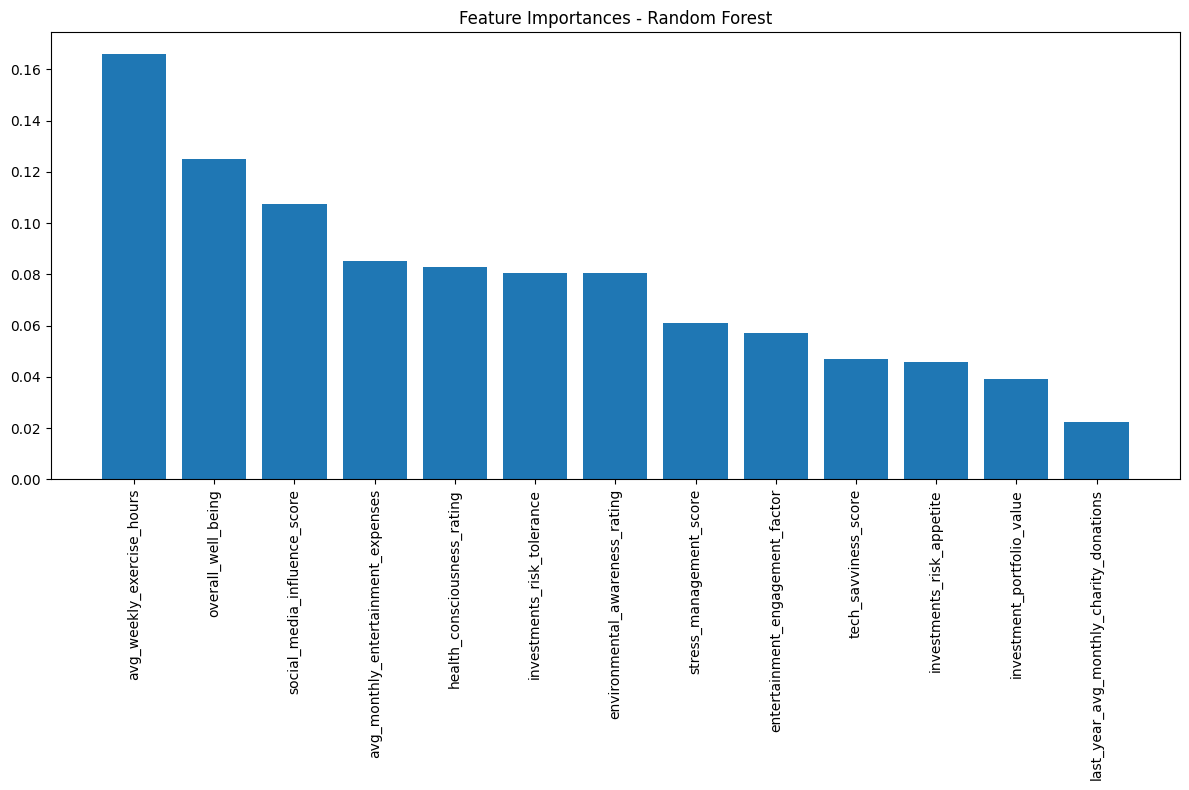

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_original, Y)

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
rf_features = X_original.columns
rf_indices = np.argsort(rf_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_original.shape[1]), rf_importances[rf_indices], align="center")
plt.xticks(range(X_original.shape[1]), rf_features[rf_indices], rotation=90)
plt.tight_layout()
plt.show()

RandomForestClassifier(n_estimators=200, random_state=42)

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances - Random Forest')

<BarContainer object of 15 artists>

([<matplotlib.axis.XTick at 0x7c813a7c9f00>,
 [Text(0, 0, 'log_avg_weekly_exercise_hours'),
  Text(1, 0, 'overall_well_being'),
  Text(2, 0, 'social_media_influence_score'),
  Text(3, 0, 'log_avg_monthly_entertainment_expenses'),
  Text(4, 0, 'log_health_consciousness_rating'),
  Text(5, 0, 'log_environmental_awareness_rating'),
  Text(6, 0, 'log_investments_risk_tolerance'),
  Text(7, 0, 'stress_management_score'),
  Text(8, 0, 'entertainment_engagement_factor'),
  Text(9, 0, 'tech_savviness_score'),
  Text(10, 0, 'investments_risk_appetite'),
  Text(11, 0, 'log_investment_portfolio_value'),
  Text(12, 0, 'last_year_avg_monthly_charity_donations'),
  Text(13, 0, 'age_bins_encoded'),
  Text(14, 0, 'gender_encoded')])

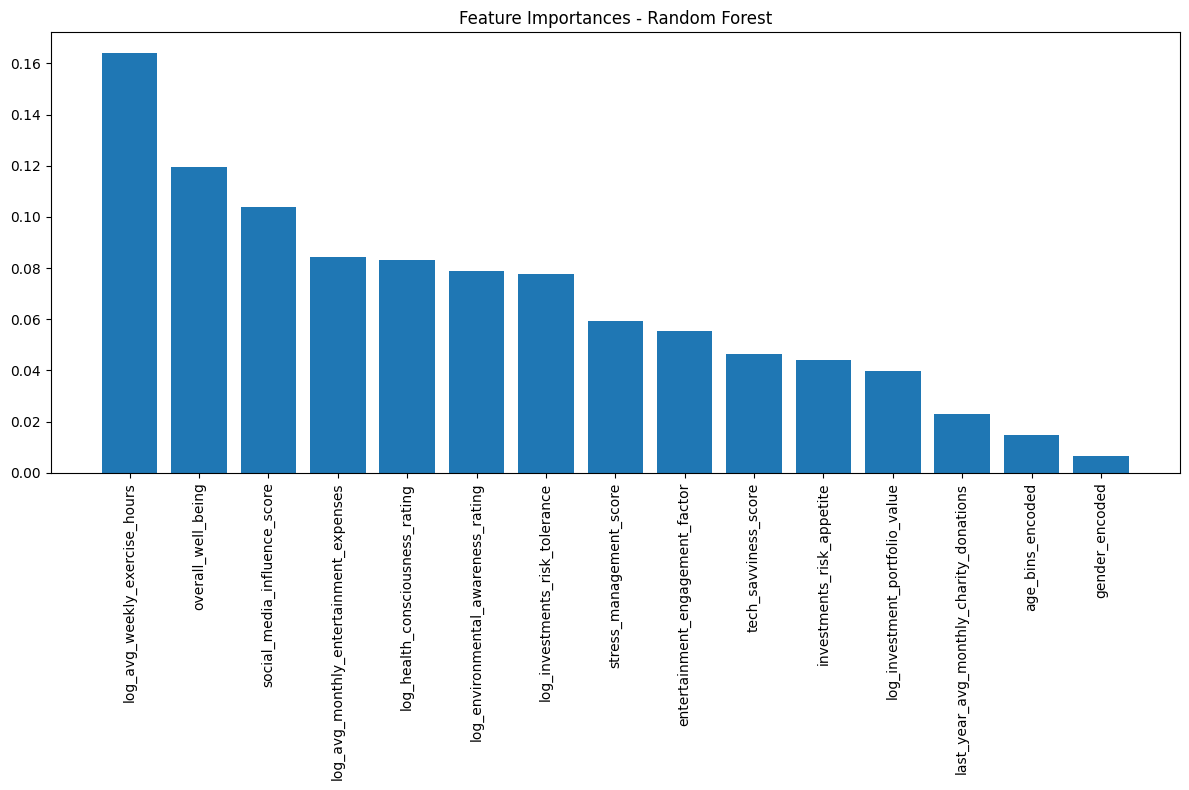

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_feature_engineering, Y)

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
rf_features = X_feature_engineering.columns
rf_indices = np.argsort(rf_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_feature_engineering.shape[1]), rf_importances[rf_indices], align="center")
plt.xticks(range(X_feature_engineering.shape[1]), rf_features[rf_indices], rotation=90)
plt.tight_layout()
plt.show()

RandomForestClassifier(n_estimators=200, random_state=42)

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances - Random Forest')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x7c813a69f760>,
 [Text(0, 0, 'overall_well_being'),
  Text(1, 0, 'health_pca'),
  Text(2, 0, 'log_environmental_awareness_rating'),
  Text(3, 0, 'tech_pca'),
  Text(4, 0, 'entertainment_pca'),
  Text(5, 0, 'investment_pca'),
  Text(6, 0, 'age_bins_encoded'),
  Text(7, 0, 'last_year_avg_monthly_charity_donations'),
  Text(8, 0, 'gender_encoded')])

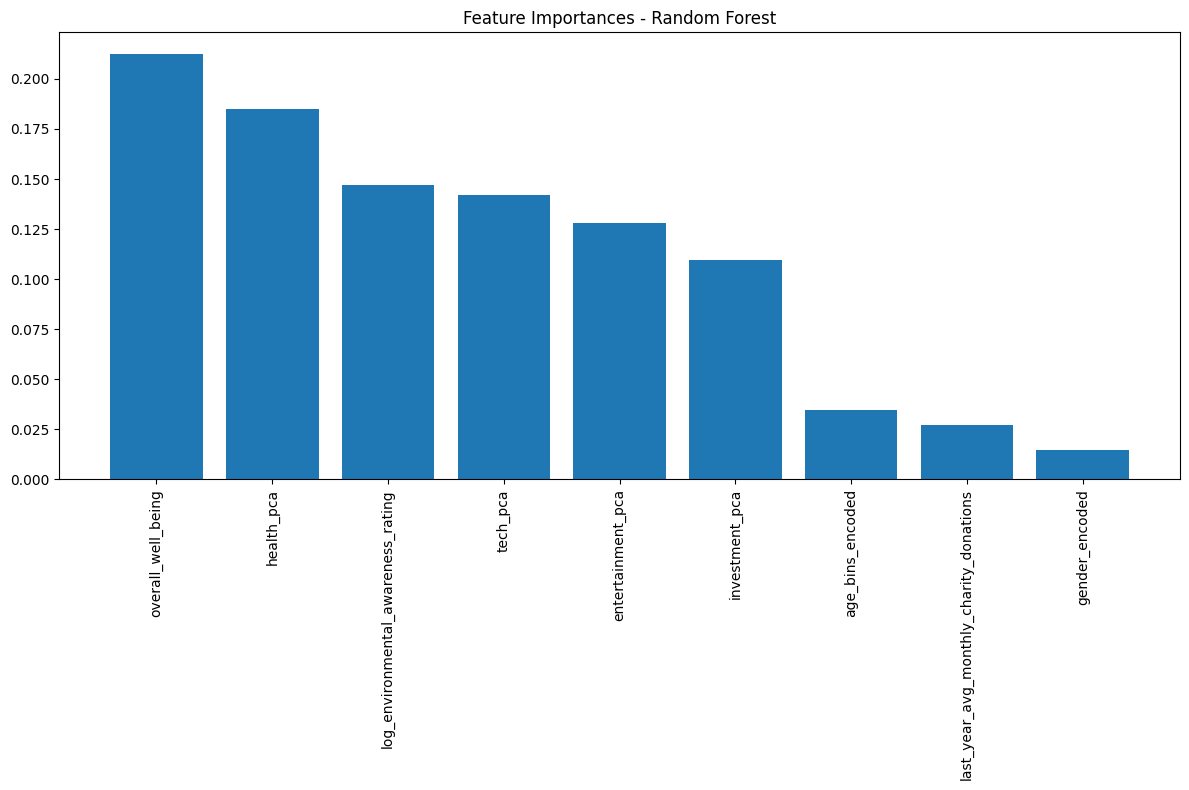

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_PCA, Y)

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
rf_features = X_PCA.columns
rf_indices = np.argsort(rf_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_PCA.shape[1]), rf_importances[rf_indices], align="center")
plt.xticks(range(X_PCA.shape[1]), rf_features[rf_indices], rotation=90)
plt.tight_layout()
plt.show()

---

In [ ]:
selected_columns = [
    'log_environmental_awareness_rating',
    'log_investment_portfolio_value',
    'log_investments_risk_tolerance',
    'log_avg_monthly_entertainment_expenses',
    'log_avg_weekly_exercise_hours',
    'log_health_consciousness_rating',
    'last_year_avg_monthly_charity_donations',
    'investments_risk_appetite',
    'tech_savviness_score',
    'social_media_influence_score',
    'entertainment_engagement_factor',
    'stress_management_score',
    'overall_well_being'
]

selected_columns

['log_environmental_awareness_rating',
 'log_investment_portfolio_value',
 'log_investments_risk_tolerance',
 'log_avg_monthly_entertainment_expenses',
 'log_avg_weekly_exercise_hours',
 'log_health_consciousness_rating',
 'last_year_avg_monthly_charity_donations',
 'investments_risk_appetite',
 'tech_savviness_score',
 'social_media_influence_score',
 'entertainment_engagement_factor',
 'stress_management_score',
 'overall_well_being']

## <font color=72beea> **4. Modeling** </font>

In [ ]:
#filter train data
X_train_selected = X.loc[:,selected_columns]

#filter test data
X_test_selected = test_clean.loc[:,selected_columns]

### <font color=72beea> **4.1. Decision Tree Classifier** </font>

In [ ]:
def cross_validation(X, y, model, method):
    score_train = []
    score_val = []

  # Method: KFold
    for train_index, val_index in method.split(X,y):

        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]


        feature_scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_val_scaled = pd.DataFrame(feature_scaler.transform(X_val), columns= X_val.columns, index=X_val.index)

        # Fit train, predict on train and val
        model.fit(X_train_scaled, y_train)
        train_pred = model.predict(X_train_scaled)
        val_pred = model.predict(X_val_scaled)

        # Calculate weighted F1 score
        value_train = f1_score(train_pred, y_train, average = 'weighted')
        value_val = f1_score(val_pred, y_val, average = 'weighted')

        # Append it to score lists
        score_train.append(value_train)
        score_val.append(value_val)

    return np.mean(score_train), np.mean(score_val)

In [ ]:
#Initialize random seed to make results reproducible
random.seed(15)

# Set parameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [60, 100, 120],
    'min_samples_split': [150, 200],
    'min_samples_leaf': [40, 50, 60],
    'class_weight': ['balanced']
}

# List to store results
result = []

# How many different sets of parameters we will try
num_iterations = 30

# Splits in cross-validation
kf = StratifiedKFold(n_splits=5)

for i in tqdm(range(num_iterations)):

    # Choose random parameters from parameters grid
    random_params = {}
    for key, values in param_grid.items():
        random_params[key] = random.choice(values)

    # Define Decision Tree and set parameters
    model = DecisionTreeClassifier()
    model.set_params(**random_params)

    train_f1, val_f1 = cross_validation(X_train_selected, Y, model, kf)

    result.append([train_f1, val_f1, list(random_params.values())])

  0%|          | 0/30 [00:00<?, ?it/s]

DecisionTreeClassifier(class_weight='balanced', max_depth=60,
                       min_samples_leaf=40, min_samples_split=150)

  3%|▎         | 1/30 [00:07<03:36,  7.46s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=60,
                       min_samples_leaf=60, min_samples_split=150)

  7%|▋         | 2/30 [00:15<03:44,  8.01s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=60,
                       min_samples_leaf=50, min_samples_split=200)

 10%|█         | 3/30 [00:23<03:25,  7.62s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=50,
                       min_samples_split=200)

 13%|█▎        | 4/30 [00:35<04:11,  9.66s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=40, min_samples_split=200)

 17%|█▋        | 5/30 [00:44<03:54,  9.39s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=60, min_samples_leaf=50,
                       min_samples_split=200)

 20%|██        | 6/30 [00:56<04:04, 10.19s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=50, min_samples_split=200)

 23%|██▎       | 7/30 [01:03<03:34,  9.31s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=50,
                       min_samples_split=150)

 27%|██▋       | 8/30 [01:16<03:44, 10.21s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=60,
                       min_samples_leaf=60, min_samples_split=150)

 30%|███       | 9/30 [01:23<03:15,  9.30s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=120, min_samples_leaf=40,
                       min_samples_split=200)

 33%|███▎      | 10/30 [01:35<03:21, 10.05s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=40, min_samples_split=150)

 37%|███▋      | 11/30 [01:43<03:02,  9.61s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=40,
                       min_samples_split=150)

 40%|████      | 12/30 [01:55<03:05, 10.33s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=60,
                       min_samples_leaf=50, min_samples_split=200)

 43%|████▎     | 13/30 [02:02<02:39,  9.39s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=50,
                       min_samples_split=200)

 47%|████▋     | 14/30 [02:14<02:42, 10.15s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=40, min_samples_split=200)

 50%|█████     | 15/30 [02:23<02:26,  9.80s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=40,
                       min_samples_split=200)

 53%|█████▎    | 16/30 [02:35<02:25, 10.39s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=40, min_samples_split=150)

 57%|█████▋    | 17/30 [02:44<02:08,  9.86s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=50, min_samples_split=150)

 60%|██████    | 18/30 [02:51<01:48,  9.07s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=60, min_samples_leaf=50,
                       min_samples_split=150)

 63%|██████▎   | 19/30 [03:03<01:49,  9.98s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=60, min_samples_leaf=60,
                       min_samples_split=200)

 67%|██████▋   | 20/30 [03:15<01:45, 10.51s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=120,
                       min_samples_leaf=40, min_samples_split=150)

 70%|███████   | 21/30 [03:23<01:27,  9.68s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=40,
                       min_samples_split=200)

 73%|███████▎  | 22/30 [03:34<01:21, 10.24s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=50,
                       min_samples_split=150)

 77%|███████▋  | 23/30 [03:46<01:16, 10.86s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=120,
                       min_samples_leaf=60, min_samples_split=200)

 80%|████████  | 24/30 [03:55<01:00, 10.08s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=60,
                       min_samples_leaf=40, min_samples_split=200)

 83%|████████▎ | 25/30 [04:02<00:46,  9.21s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=60,
                       min_samples_split=150)

 87%|████████▋ | 26/30 [04:14<00:40, 10.03s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=60,
                       min_samples_split=150)

 90%|█████████ | 27/30 [04:26<00:31, 10.58s/it]

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=40, min_samples_split=150)

 93%|█████████▎| 28/30 [04:33<00:19,  9.60s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=50,
                       min_samples_split=150)

 97%|█████████▋| 29/30 [04:45<00:10, 10.44s/it]

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=60,
                       min_samples_split=200)

100%|██████████| 30/30 [04:57<00:00,  9.93s/it]


<Figure size 1500x600 with 0 Axes>

Text(0.5, 0, 'Hyperparameters')

Text(0, 0.5, 'Score')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, "['gini', 120, 200, 60, 'balanced']"),
  Text(1, 0, "['gini', 60, 200, 50, 'balanced']"),
  Text(2, 0, "['gini', 100, 200, 50, 'balanced']"),
  Text(3, 0, "['gini', 100, 200, 40, 'balanced']"),
  Text(4, 0, "['gini', 60, 200, 40, 'balanced']"),
  Text(5, 0, "['gini', 60, 150, 60, 'balanced']"),
  Text(6, 0, "['gini', 100, 150, 50, 'balanced']"),
  Text(7, 0, "['entropy', 60, 200, 60, 'balanced']"),
  Text(8, 0, "['entropy', 100, 200, 60, 'balanced']"),
  Text(9, 0, "['gini', 100, 150, 40, 'balanced']"),
  Text(10, 0, "['gini', 120, 150, 40, 'balanced']"),
  Text(11, 0, "['gini', 60, 150, 40, 'balanced']"),
  Text(12, 0, "['entropy', 60, 200, 50, 'balanced']"),
  Text(13, 0, "['entropy', 100, 200, 50, 'balanced']"),
  Text(14, 0, "['entropy', 120, 200, 40, 'balanced']"),
  Text(15, 0, "['entropy', 100, 200, 40, 'balanced']"),
  Text(16, 0, "['entropy', 100, 150, 60, 'balanced']"),
  Text(17, 0, "['entr

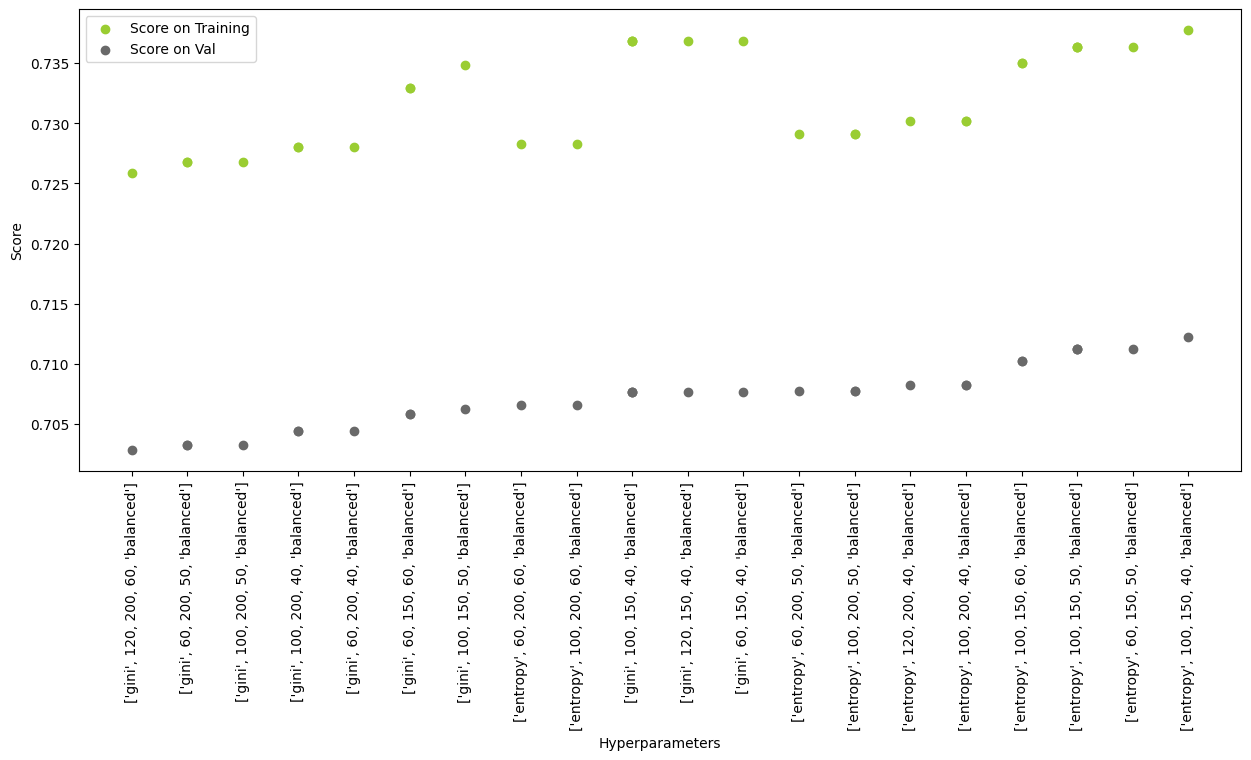

In [ ]:
scores = pd.DataFrame(result, columns = ['Score_Train', 'Score_Val', 'Parameters']).sort_values('Score_Val')
plt.figure(figsize=(15,6))
plt.scatter(scores['Parameters'].astype(str), scores['Score_Train'], label="Score on Training", color='yellowgreen')
plt.scatter(scores['Parameters'].astype(str), scores['Score_Val'], label="Score on Val", color='dimgray')
plt.xlabel("Hyperparameters")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.legend()
plt.show()

### <font color=72beea> **4.2. Logistic Regression** </font>

In [ ]:
f1_scorer = make_scorer(f1_score, average='weighted')

#define the parameter distribution
param_distributions = {
    'C': [0.2, 0.4, 1, 5],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# RandomizedSearchCV
def run_model_LRC(X_train, Y_train):
    random_search = RandomizedSearchCV(
        LogisticRegression(),
        param_distributions,
        n_iter=12,
        cv=5,
        scoring=f1_scorer,
        random_state=42
    )
    random_search.fit(X_train, Y_train)
    best_estimator = random_search.best_estimator_
    best_params = random_search.best_params_
    return best_estimator, best_params

def evaluate_model(X, Y, model):
    y_pred = model.predict(X)
    f1 = f1_score(Y, y_pred, average='weighted')
    return f1

kf = StratifiedKFold(n_splits=5)

def avg_score_LRC(method, X, Y):
    best_validation_score = -np.inf
    best_training_score = None
    best_params = None

    for train_index, test_index in method.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        feature_scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test_scaled = pd.DataFrame(feature_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

        best_estimator, params = run_model_LRC(X_train_scaled, Y_train)
        train_score = evaluate_model(X_train_scaled, Y_train, best_estimator)
        test_score = evaluate_model(X_test_scaled, Y_test, best_estimator)

        #update the best scores and parameters
        if test_score > best_validation_score:
            best_validation_score = test_score
            best_training_score = train_score
            best_params = params

    print('Best Validation F1 Score:', best_validation_score)
    print('Corresponding Train F1 Score:', best_training_score)
    print('Best Parameters:', best_params)

avg_score_LRC(kf, X_train_selected, Y)

Best Validation F1 Score: 0.6580620361825947
Corresponding Train F1 Score: 0.6518414475965089
Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.2}


### <font color=72beea> **4.3. Random Forest Classifier** </font>

In [ ]:
def run_model_RFC(X, Y):
    model = RandomForestClassifier(
        criterion='entropy',
        n_estimators=140,
        max_depth=20,
        min_samples_split=6,
        min_samples_leaf=6,
        class_weight='balanced',
        random_state=42).fit(X, Y)
    return model

def evaluate_model(X, Y, model):
    y_pred = model.predict(X)
    f1 = f1_score(Y, y_pred, average='weighted')
    return f1

kf = StratifiedKFold(n_splits=5)

def avg_score_RFC(method, X, Y):

    score_train = []
    score_test = []

    # method: KFold
    for train_index, test_index in method.split(X, Y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]


        feature_scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test_scaled = pd.DataFrame(feature_scaler.transform(X_test), columns= X_test.columns, index=X_test.index)


        # run_model_LR function
        model = run_model_RFC(X_train_scaled, Y_train)

        # evaluate_model function
        value_train = evaluate_model(X_train_scaled, Y_train, model)
        value_test = evaluate_model(X_test_scaled, Y_test, model)

        score_train.append(value_train)
        score_test.append(value_test)

    print('Train F1 Score:', np.mean(score_train))
    print('Validation F1 Score:', np.mean(score_test))

avg_score_RFC(kf, X_train_selected, Y)

Train F1 Score: 0.8768920663948346
Validation F1 Score: 0.7673673792428692


### <font color=72beea> **4.4. Gradient Boosting Classifier** </font>

In [ ]:
# Define the parmaters to test
learning_rates = [0.4, 0.6]
n_estimators_list = [110]
max_depth_list = [4]

kf = StratifiedKFold(n_splits=5)

def avg_score_GBC(kf, X, Y, learning_rate, n_estimators, max_depth):
    score_train = []
    score_test = []

    for train_index, test_index in kf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        feature_scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test_scaled = pd.DataFrame(feature_scaler.transform(X_test), columns= X_test.columns, index=X_test.index)

        model = GradientBoostingClassifier(
            learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
        model.fit(X_train_scaled, Y_train)

        y_pred_train = model.predict(X_train_scaled)
        train_score = f1_score(Y_train, y_pred_train, average='weighted')

        y_pred_test = model.predict(X_test_scaled)
        test_score = f1_score(Y_test, y_pred_test, average='weighted')

        score_train.append(train_score)
        score_test.append(test_score)

    return np.mean(score_train), np.mean(score_test)

for lr in learning_rates:
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            train_score, test_score = avg_score_GBC(kf, X_train_selected, Y, lr, n_estimators, max_depth)
            print(f"Learning Rate: {lr}, n_estimators: {n_estimators}, max_depth: {max_depth}")
            print(f"Train F1 Score: {train_score:.3f}")
            print(f"Validation F1 Score: {test_score:.3f}")
            print('-' * 30)


Learning Rate: 0.4, n_estimators: 110, max_depth: 4
Train F1 Score: 0.842
Validation F1 Score: 0.771
------------------------------
Learning Rate: 0.6, n_estimators: 110, max_depth: 4
Train F1 Score: 0.859
Validation F1 Score: 0.764
------------------------------


### <font color=72beea> **4.5. KNN** </font>

In [ ]:
kf = StratifiedKFold(n_splits=5)

param_grid = {'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]}

def avg_score_KNNC(method, X, Y, param_grid):
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=method.split(X, Y), scoring='accuracy')

    grid_search.fit(X, Y)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

avg_score_KNNC(kf, X_train_selected, Y, param_grid)

Best Parameters: {'n_neighbors': 25}
Best Score: 0.640139751552795


In [ ]:
kf = StratifiedKFold(n_splits=5)

def run_model_KNNC(X, Y):
    model = KNeighborsClassifier(n_neighbors=25).fit(X, Y)
    return model

def evaluate_model(X, Y, model):
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    Y_array = Y.values if isinstance(Y, pd.Series) else Y

    y_pred = model.predict(X_array)

    f1 = f1_score(Y_array, y_pred, average='weighted')
    return f1


def avg_score_KNNC(method, X, Y):

    score_train = []
    score_test = []

    feature_scaler = MinMaxScaler()

    # method: KFold
    for train_index, test_index in method.split(X, Y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        feature_scaler.fit(X_train)
        X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test_scaled = pd.DataFrame(feature_scaler.transform(X_test), columns= X_test.columns, index=X_test.index)

        # run_model_LR function
        model = run_model_KNNC(X_train_scaled, Y_train)

        # evaluate_model function
        value_train = evaluate_model(X_train_scaled, Y_train, model)
        value_test = evaluate_model(X_test_scaled, Y_test, model)

        score_train.append(value_train)
        score_test.append(value_test)

    print('Train F1 Score:', np.mean(score_train))
    print('Validation F1 Score:', np.mean(score_test))

avg_score_KNNC(kf, X_train_selected, Y)

Train F1 Score: 0.7327035003864472
Validation F1 Score: 0.7140200018897909


### <font color=72beea> **4.6. Stacking Classifier** </font>

In [ ]:
base_learners = [
    ('rf', RandomForestClassifier(criterion='entropy',
        n_estimators=140,
        max_depth=20,
        min_samples_split=6,
        min_samples_leaf=6,
        class_weight='balanced')),
    ('gb', GradientBoostingClassifier(
            n_estimators=110,
            max_depth=4,
            learning_rate=0.4)),
    ('dt', DecisionTreeClassifier(
            criterion = 'entropy',
            max_depth = 100,
            min_samples_split = 150,
            min_samples_leaf = 40,
            class_weight = 'balanced')),
    ('knn', KNeighborsClassifier(
        n_neighbors=25))
]


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

def avg_score_stacking(kf, X, y, final_estimator):
    score_train = []
    score_test = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        feature_scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test_scaled = pd.DataFrame(feature_scaler.transform(X_test), columns= X_test.columns, index=X_test.index)

        model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator)
        model.fit(X_train_scaled, Y_train)

        train_score = model.score(X_train_scaled, Y_train)
        test_score = model.score(X_test_scaled, Y_test)

        score_train.append(train_score)
        score_test.append(test_score)

    return np.mean(score_train), np.mean(score_test)

train_score, test_score = avg_score_stacking(kf, X_train_selected, Y,
                                                 LogisticRegression(multi_class='multinomial',
                                                                    solver='lbfgs',
                                                                    random_state=42,
                                                                    max_iter=200))

print(f"Train Score: {train_score:.3f}")
print(f"Validation Score: {test_score:.3f}")

Train Score: 0.871
Validation Score: 0.778


## <font color=72beea> **6. Final Model** </font>

In [ ]:
# Final model
feature_scaler = MinMaxScaler().fit(X_train_selected)

X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train_selected),
                              columns=X_train_selected.columns,
                              index=X_train_selected.index)
X_test_scaled = pd.DataFrame(feature_scaler.transform(X_test_selected),
                             columns= X_test_selected.columns,
                             index=X_test_selected.index)

base_learners = [
    ('rf', RandomForestClassifier(
        criterion='entropy',
        n_estimators=140,
        max_depth=20,
        min_samples_split=6,
        min_samples_leaf=6,
        class_weight='balanced')),
    ('gb', GradientBoostingClassifier(
        n_estimators=110,
        max_depth=4,
        learning_rate=0.4)),
    ('dt', DecisionTreeClassifier(
        criterion = 'entropy',
        max_depth = 100,
        min_samples_split = 150,
        min_samples_leaf = 40,
        class_weight = 'balanced')),
    ('knn', KNeighborsClassifier(
        n_neighbors=25))
]

model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(multi_class='multinomial',
                                                                    solver='lbfgs',
                                                                    random_state=42,
                                                                    max_iter=200)).fit(X_train_scaled, Y)

In [ ]:
# Generate predictions for test dataset
test_predictions = model.predict(X_test_scaled)

# Decode encoded lifestyle_type column
decoding = {
    0: 'Adventure Seeker',
    1: 'Fitness Enthusiast',
    2: 'Health-Conscious',
    3: 'Investor',
    4: 'Travel Enthusiast'
}
categories = pd.Series(test_predictions).map(decoding)

result = pd.DataFrame({'citizen_id': X_test_scaled.index, 'lifestyle_type': categories})

In [ ]:
file_path = '/content/drive/MyDrive/Homework_Group06/DM2_Project Datasets/DT_Group06_Version42.csv'

# Export to CSV
result.to_csv(file_path, index=False)